# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [27]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from scipy import stats
csv_path = 'recipe_site_traffic_2212.csv'

df = pd.read_csv(csv_path)
df = df.set_index('recipe')
print(df.head())
print(df.shape)

        calories  carbohydrate  sugar  protein   category servings high_traffic
recipe                                                                         
1            NaN           NaN    NaN      NaN       Pork        6         High
2          35.48         38.56   0.66     0.92     Potato        4         High
3         914.28         42.68   3.09     2.88  Breakfast        1          NaN
4          97.03         30.56  38.63     0.02  Beverages        4         High
5          27.05          1.85   0.80     0.53  Beverages        4          NaN
(947, 7)


In [28]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [29]:
df.isna().sum()

calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [30]:
print(df['high_traffic'].value_counts())
df['high_traffic'] = df['high_traffic'].fillna('Low')
print(df['high_traffic'].value_counts())

High    574
Name: high_traffic, dtype: int64
High    574
Low     373
Name: high_traffic, dtype: int64


In [31]:
print(df[df['servings'] == '4 as a snack'])

print(df[df['servings'] == '6 as a snack'])

        calories  carbohydrate  sugar  ...      category      servings high_traffic
recipe                                 ...                                         
452      1542.53         14.73   5.71  ...  Lunch/Snacks  4 as a snack         High
736       513.75         65.87  18.63  ...  Lunch/Snacks  4 as a snack          Low

[2 rows x 7 columns]
        calories  carbohydrate  sugar  ...      category      servings high_traffic
recipe                                 ...                                         
549      1440.69         30.59   5.78  ...  Lunch/Snacks  6 as a snack         High

[1 rows x 7 columns]


In [32]:
df['calories'] = df['calories'].fillna(df['calories'].mean())
df['carbohydrate'] = df['carbohydrate'].fillna(df['carbohydrate'].mean())
df['sugar'] = df['sugar'].fillna(df['sugar'].mean())
df['protein'] = df['protein'].fillna(df['protein'].mean())
df.isna().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [33]:
print(df['servings'].value_counts())
df['servings'] = df['servings'].str.replace('4 as a snack','4').replace('6 as a snack','6')
print(df['servings'].value_counts())

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64
4    391
6    198
2    183
1    175
Name: servings, dtype: int64


In [34]:
print(df['category'].value_counts())
df['category'] = df['category'].str.replace('Chicken Breast','Chicken')
print(df['category'].value_counts())

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64


### Data Validation
This data set has 947 rows, 7 columns. I have validated all variables and I have made some changes to validate data. Here are the data description after validation

- recipe: 947 recipes without missing values, same as the description. No cleaning is needed.
- calories: numeric values with 52 missing values, impute these missing values with the mean of calories data (avoid missing rows with interesting values i.e. category and servings)
- carbohydrate: numeric values with 52 missing values, impute these missing values with the mean of carbohydrate data (avoid missing rows with interesting values i.e. category and servings)
- sugar: numeric values with 52 missing values, impute these missing values with the mean of sugar data (avoid missing rows with interesting values i.e. category and servings)
- protein: numeric values with 52 missing values, impute these missing values with the mean of protein data (avoid missing rows with interesting values i.e. category and servings)
- category: 11 categories while 10 categories are needed, The 'Chicken Breast' category have been replaced with 'Chicken'.
- servings: 6 categories at the beginning with no missing values, I replaced "4 as a snack" with 4 and "6 as a snack" with 6. I end up with 4 categories
- high_traffic: 1 Category with 373 missing values at the beginning, I have replaced NaN with thee possible values without missing values, same as the description. No cleaning is needed.

### Exploratory Analysis

I have investigated the target variable and features of the recipes, and the relationship between target variable and features. After the analysis, I decided to apply the following changes to enable modeling:

Recipe : set as index because it will not add any value to the result
Calories, carbohydrates: use log transformation to avoid skewness
Sugar, protein, using coxbox transformation to avoid skewness aswell but working with values near 0 I couldn't use log
Create new ordinal variables from category and servings

In [35]:
df['servings'] = df['servings'].astype('category')

### Distribution of Calories, carbohydrate sugar and protein. 

From the histogram on the upper part below, we can see there is a longer right tail. Therefore, we transforamtion onn the variable, the distribution below is close to normal distribution. Thus, better to model.

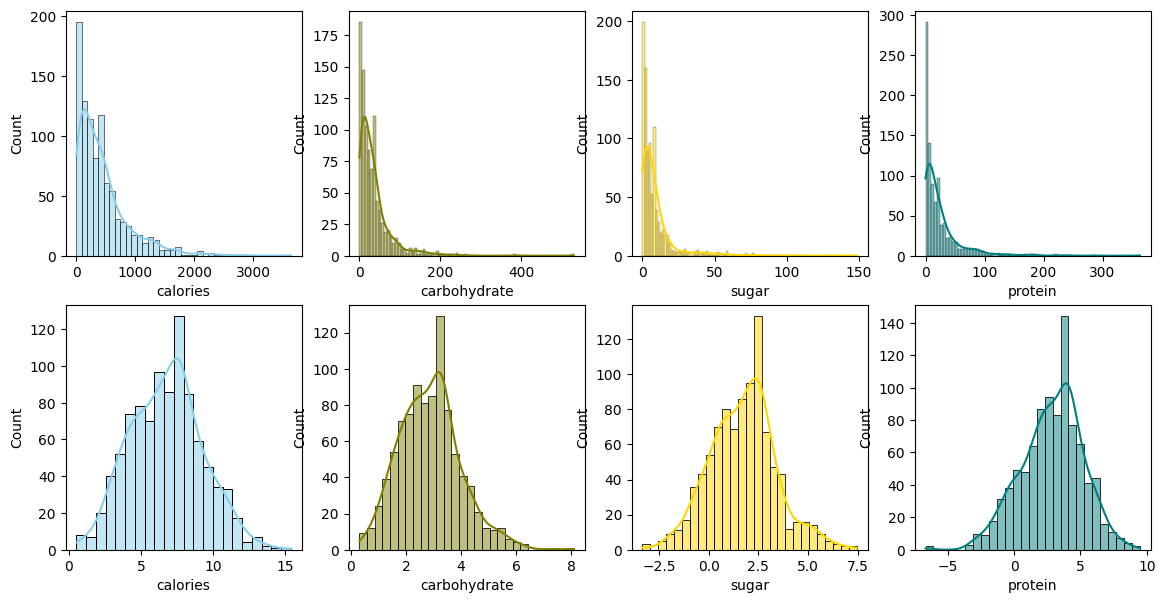

In [36]:
base_df = df.copy()

for i in ['calories','carbohydrate']:
    df[i] = np.cbrt(df[i])

for i in ['sugar','protein']:
    df[i] = stats.boxcox(df[i],0.15)

fig, axs = plt.subplots(2, 4, figsize=(14, 7))

sns.histplot(data=base_df, x="calories", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=base_df, x="carbohydrate", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=base_df, x="sugar", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=base_df, x="protein", kde=True, color="teal", ax=axs[0, 3])

sns.histplot(data=df, x="calories", kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=df, x="carbohydrate", kde=True, color="olive", ax=axs[1, 1])
sns.histplot(data=df, x="sugar", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=df, x="protein", kde=True, color="teal", ax=axs[1, 3])


plt.show()

**Relationship between the calories and nutrients of recipe and the traffic**
As we can see there is no clear relationship but there may be complex relationship that our machine learning model will learn

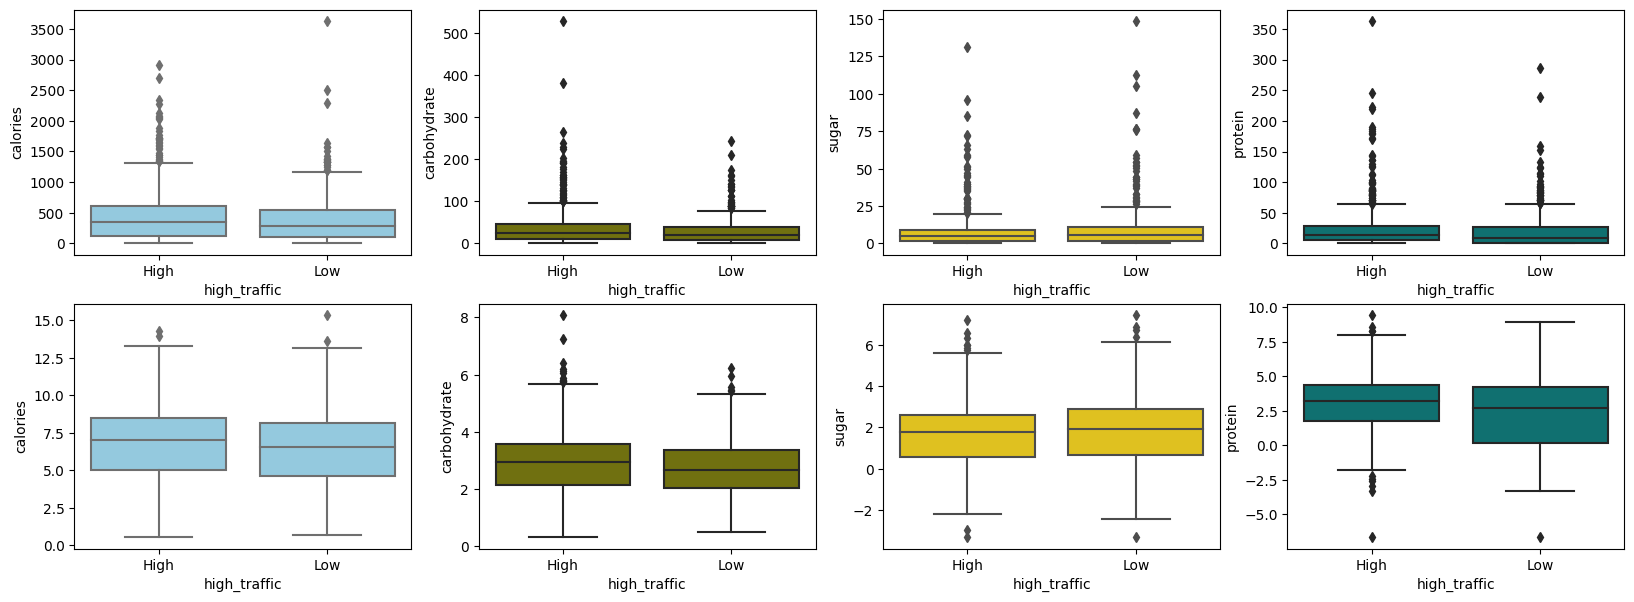

In [37]:
fig, axs = plt.subplots(2, 4, figsize=(20, 7))

sns.boxplot(data=base_df, y="calories", x='high_traffic', color="skyblue", ax=axs[0, 0])
sns.boxplot(data=base_df, y="carbohydrate", x='high_traffic', color="olive", ax=axs[0, 1])
sns.boxplot(data=base_df, y="sugar", x='high_traffic', color="gold", ax=axs[0, 2])
sns.boxplot(data=base_df, y="protein", x='high_traffic', color="teal", ax=axs[0, 3])


sns.boxplot(data=df, y="calories", x='high_traffic', color="skyblue", ax=axs[1, 0])
sns.boxplot(data=df, y="carbohydrate", x='high_traffic', color="olive", ax=axs[1, 1])
sns.boxplot(data=df, y="sugar", x='high_traffic', color="gold", ax=axs[1, 2])
sns.boxplot(data=df, y="protein", x='high_traffic', color="teal", ax=axs[1, 3])
plt.show()

**Relationship between Category and whether the traffic was high or not :**

We can clearly see on the distribution below that the category is highly correlated with the traffic, for example most of Pork or Potato recipes led to high traffic while with beverages recipes the traffic is lower.

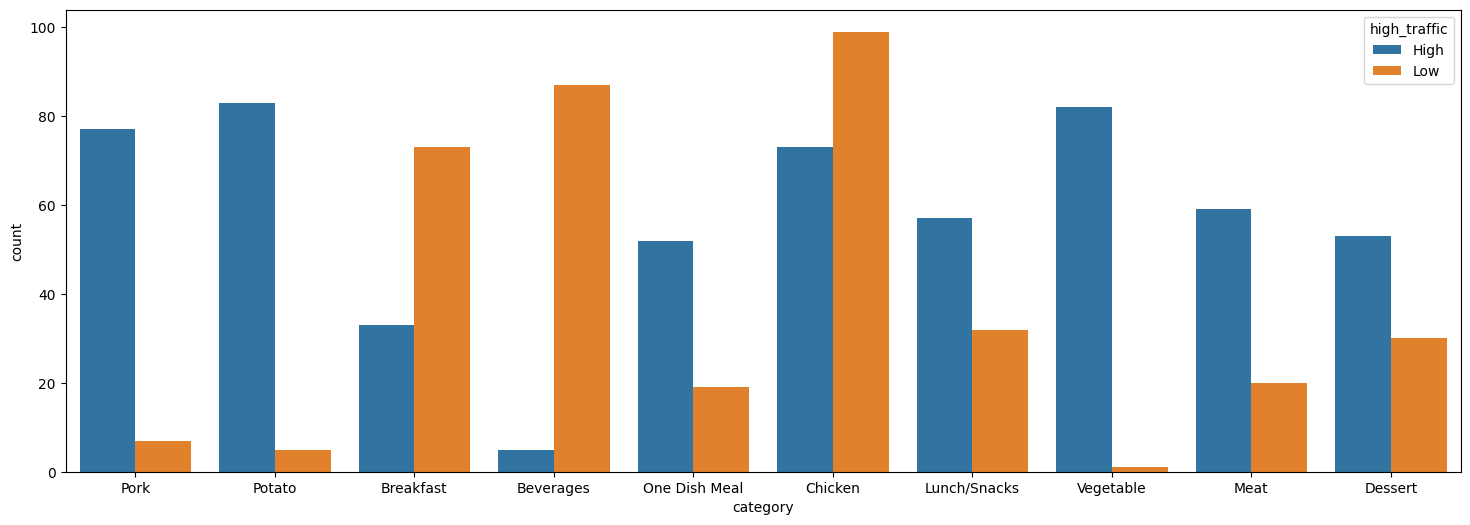

In [38]:
plt.figure(figsize=(18, 6))
sns.countplot(data = df, x='category',hue = 'high_traffic')
plt.show()

Servings seems to also have a good relationship with the traffic, however as we could see above the proportion High/Low on the dataset is a bit skewed thus this visualisation is also skewed because we have much less 'low traffic' data in our datasetb

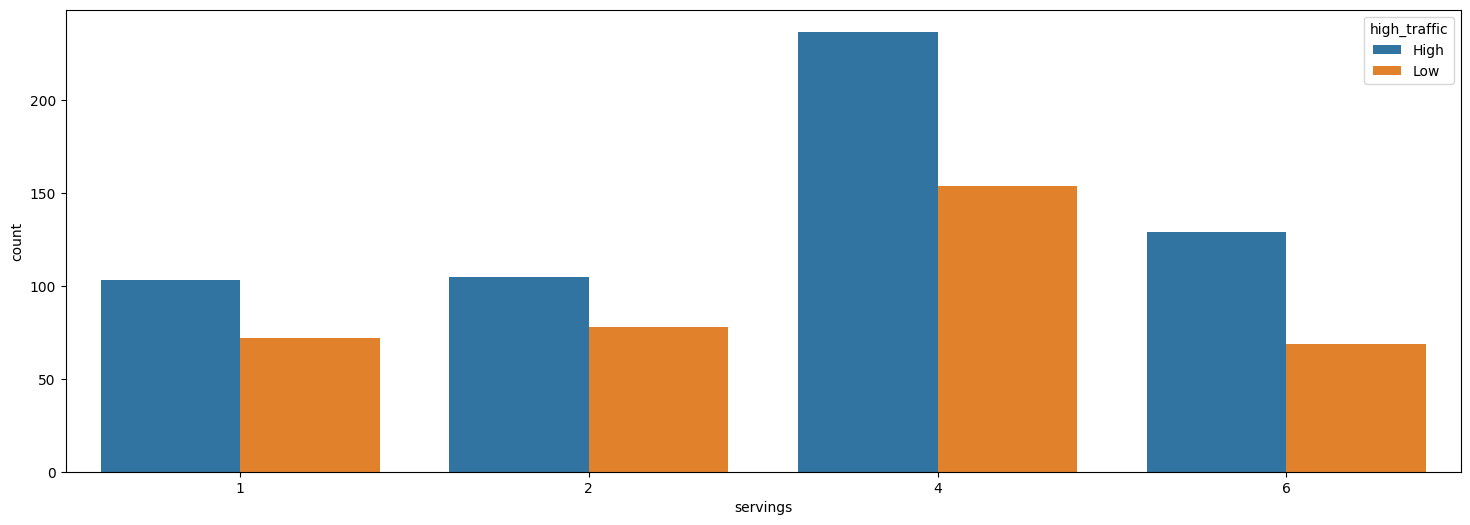

In [39]:
plt.figure(figsize=(18, 6))
sns.countplot(data = df, x='servings',hue = 'high_traffic')
plt.show()

### Model Fitting & Evaluation

Predicting the high traffic on the website is a classification problem in machine learning. I am choosing the Logistic Regression model because we can see strong to moderate relationship between some features and target variable. The comparison model I am choosing is the Decision Tree classifier model because it is easy to interpret with independence from outliers.

For the evaluation, I am choosing both Accuracy and the precision because I want to know the false positive rate. To ensure that when the model tells there is high traffic, there will really be a high traffic

**Prepare data for modelling :**

- Normalize the numeric features
- Convert the categorical variables into numeric features
- Spil the data into training set and a test set

In [40]:
df['high_traffic'] = (pd.Categorical(df['high_traffic'], categories=['Low','High']))
df['high_traffic'] = df['high_traffic'].cat.codes
df = pd.get_dummies(df, columns=['category','servings'],dtype=int)

In [41]:
y = df['high_traffic']
X = df.drop(['high_traffic'], axis=1)

In [42]:
min_max_scaler = MinMaxScaler()
X[['calories','carbohydrate','sugar','protein']] = min_max_scaler.fit_transform(X[['calories','carbohydrate','sugar','protein']])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Logistic Regression Model**

In [44]:
logreg = LogisticRegression(random_state=42,max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [45]:
y_pred_logreg = logreg.predict(X_test)

<AxesSubplot: ylabel='Feature'>

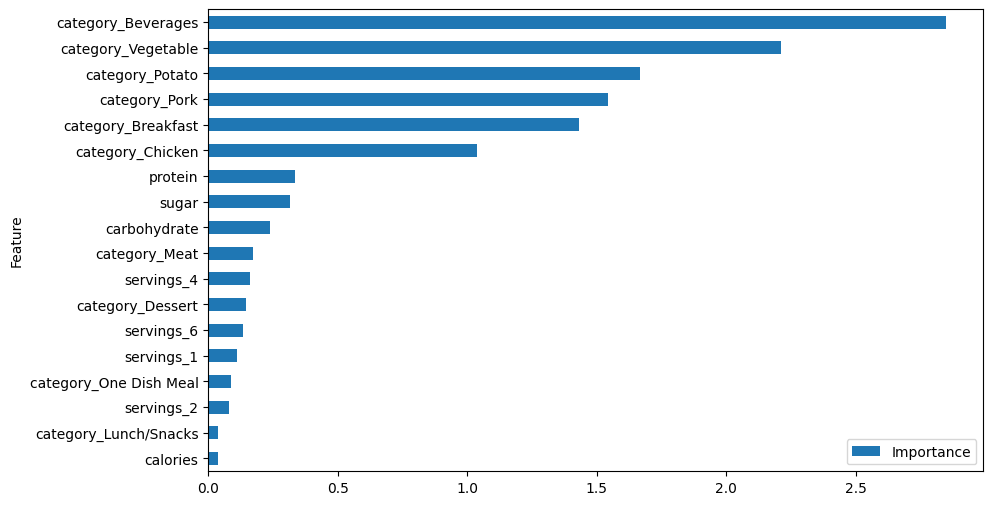

In [46]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [47]:
print(f"Stats : Logistic Regression")
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
print('Accuracy: %.3f' % accuracy_logreg) 
print('Precision: %.3f' % precision_logreg)  

Stats : Logistic Regression
Accuracy: 0.761
Precision: 0.809


**Random Forest Classifier**

In [48]:
clf_rf = RandomForestClassifier(random_state=42,max_depth=30)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, random_state=42)

In [49]:
y_pred_rf = clf_rf.predict(X_test)

In [50]:
print(f"Stats : Random Forest Classifier")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
print('Accuracy: %.3f' % accuracy_rf) 
print('Precision: %.3f' % precision_rf)  

Stats : Random Forest Classifier
Accuracy: 0.712
Precision: 0.758


### Results

The results with the Logisitic Regression and the Random Forest Classifier with the accuracy metric are 0.767 and 0.712 respectively, meaning the **Logistic Regression Model fits better**. Moreover the precision metric also shows the better fit of the Logistic regression model with 0.809 and 0.758 for the Random Forest Classifier.


### Evaluate by Business Criteria

The company wants to correctly predict high traffic 80% of the times. Therefore the correct value to monitor is the precision, because it tells out of every recipes the model classify as high traffic, how many really led to high traffic. This is the KPI I use to compare the two models again. The Higher the percentage, the better the model performs. Thus, 80.9% of the logistic regression high_traffic classification really led to high_traffic while the Random forest classifier only have 75.8 (which is quite nice also).


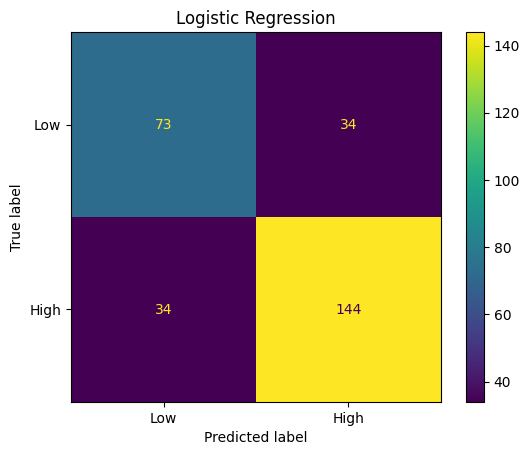

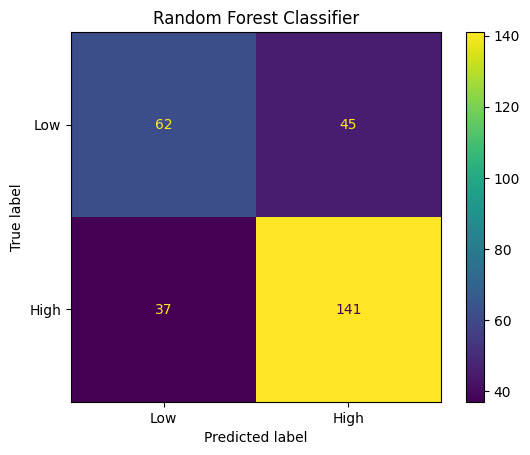

In [51]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Low', 'High'])
cm_display.plot()
plt.title('Logistic Regression')
plt.show() 


confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Low', 'High'])
cm_display.plot()
plt.title('Random Forest Classifier')
plt.show() 

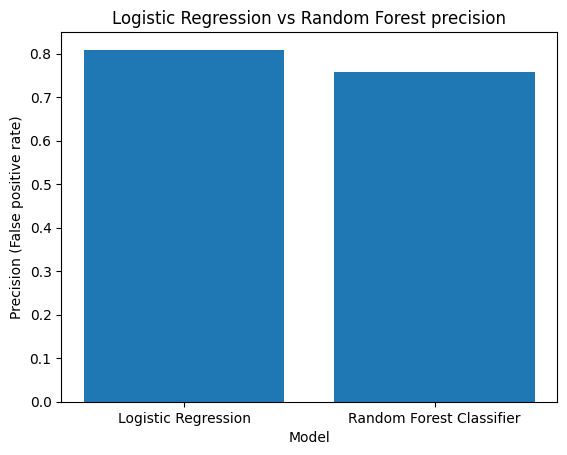

In [52]:
plt.bar(['Logistic Regression','Random Forest Classifier'],[precision_logreg, precision_rf])
plt.title('Logistic Regression vs Random Forest precision')
plt.xlabel('Model')
plt.ylabel('Precision (False positive rate)')
plt.show()

### Recommendation

To help the Product Manager - Recipe Discovery team we can plan to deploy this Logistic Regression Model into production. By implementing this model, about 80% of the high_traffic prediction will really lead to high traffic. This will help automate the whole process of recipe choosing. I will also recommend the following steps to ensure the model can be deplyed and improved regularly.

- Test the model in the recent month and compare its prediction to actual traffic on the website.
- Identify and fix errors to improve accuracy after testing.
- Fully deploy the model using efficient deployment strategy, such as a web interface or API. So your team can use the model.
- Add other nutrients and macro nutrients to the recipes dataset (Fat,Fibers...)
- Continuously improve the model by collecting more data, feature engineer (create new features) and fine tuning parameter.